# Assessment 3 - Option 2: Tree and Ensemble Learning
Objective: Analyse the Abalone dataset using decision trees, random forests, and ensemble learning to predict age using other data features.

"Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem."
Source http://archive.ics.uci.edu/ml/datasets/Abalone

Dataset format:
Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F,  and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / gives the age in years

Data transformations:
To assist with classifying age, the original data will be broken into 4 classe:
- Class 1: 0-7 years
- Class 2: 7-10 years
- Class 3: 11-15 years
- Class 4: > 15 years

## Steps
1. Visualise the dataset and provide initial commentary/analysis.
2. Clean the dataset (if necessary).
3. Apply the CART model to the problem and report performance (classification accuracy or F1 score) on train and test sets.
4. Attempt to improve performance by pre-pruning or post-pruning the tree.
5. Apply bagging of trees via random forest and report performance on train and test sets as number of trees increases.
6. For both the CART and bagging models, run 2-10 experiments with different parameters/hyper-parameters to search for a more optimal model. Report results, including performance accuracy, mean, and confidence interval.
7. OPTIONAL - Compare results with ADAM and SGD (Neural Networks).

## Step 1 - Visualise and Analyse Dataset

In [108]:
# Semi-source: https://www.geeksforgeeks.org/decision-tree-implementation-python/

# Suppress all sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Import needed packages
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

In [109]:
# Initialise global variables and seed for reproducibility
TEST_PERCENT = 0.25
EXPERIMENT = 42
MAX_DEPTH = 5
MIN_SAMPLES = 100
N_ESTIMATORS = 5
random_state = np.random.RandomState(seed=EXPERIMENT)

Dataset Shape: 
(4177, 9)

Transformed dataset: 
  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell Weight  Age by Class  
0         0.150             3  
1         0.070             1  
2         0.210             2  
3         0.155             2  
4         0.055             1  



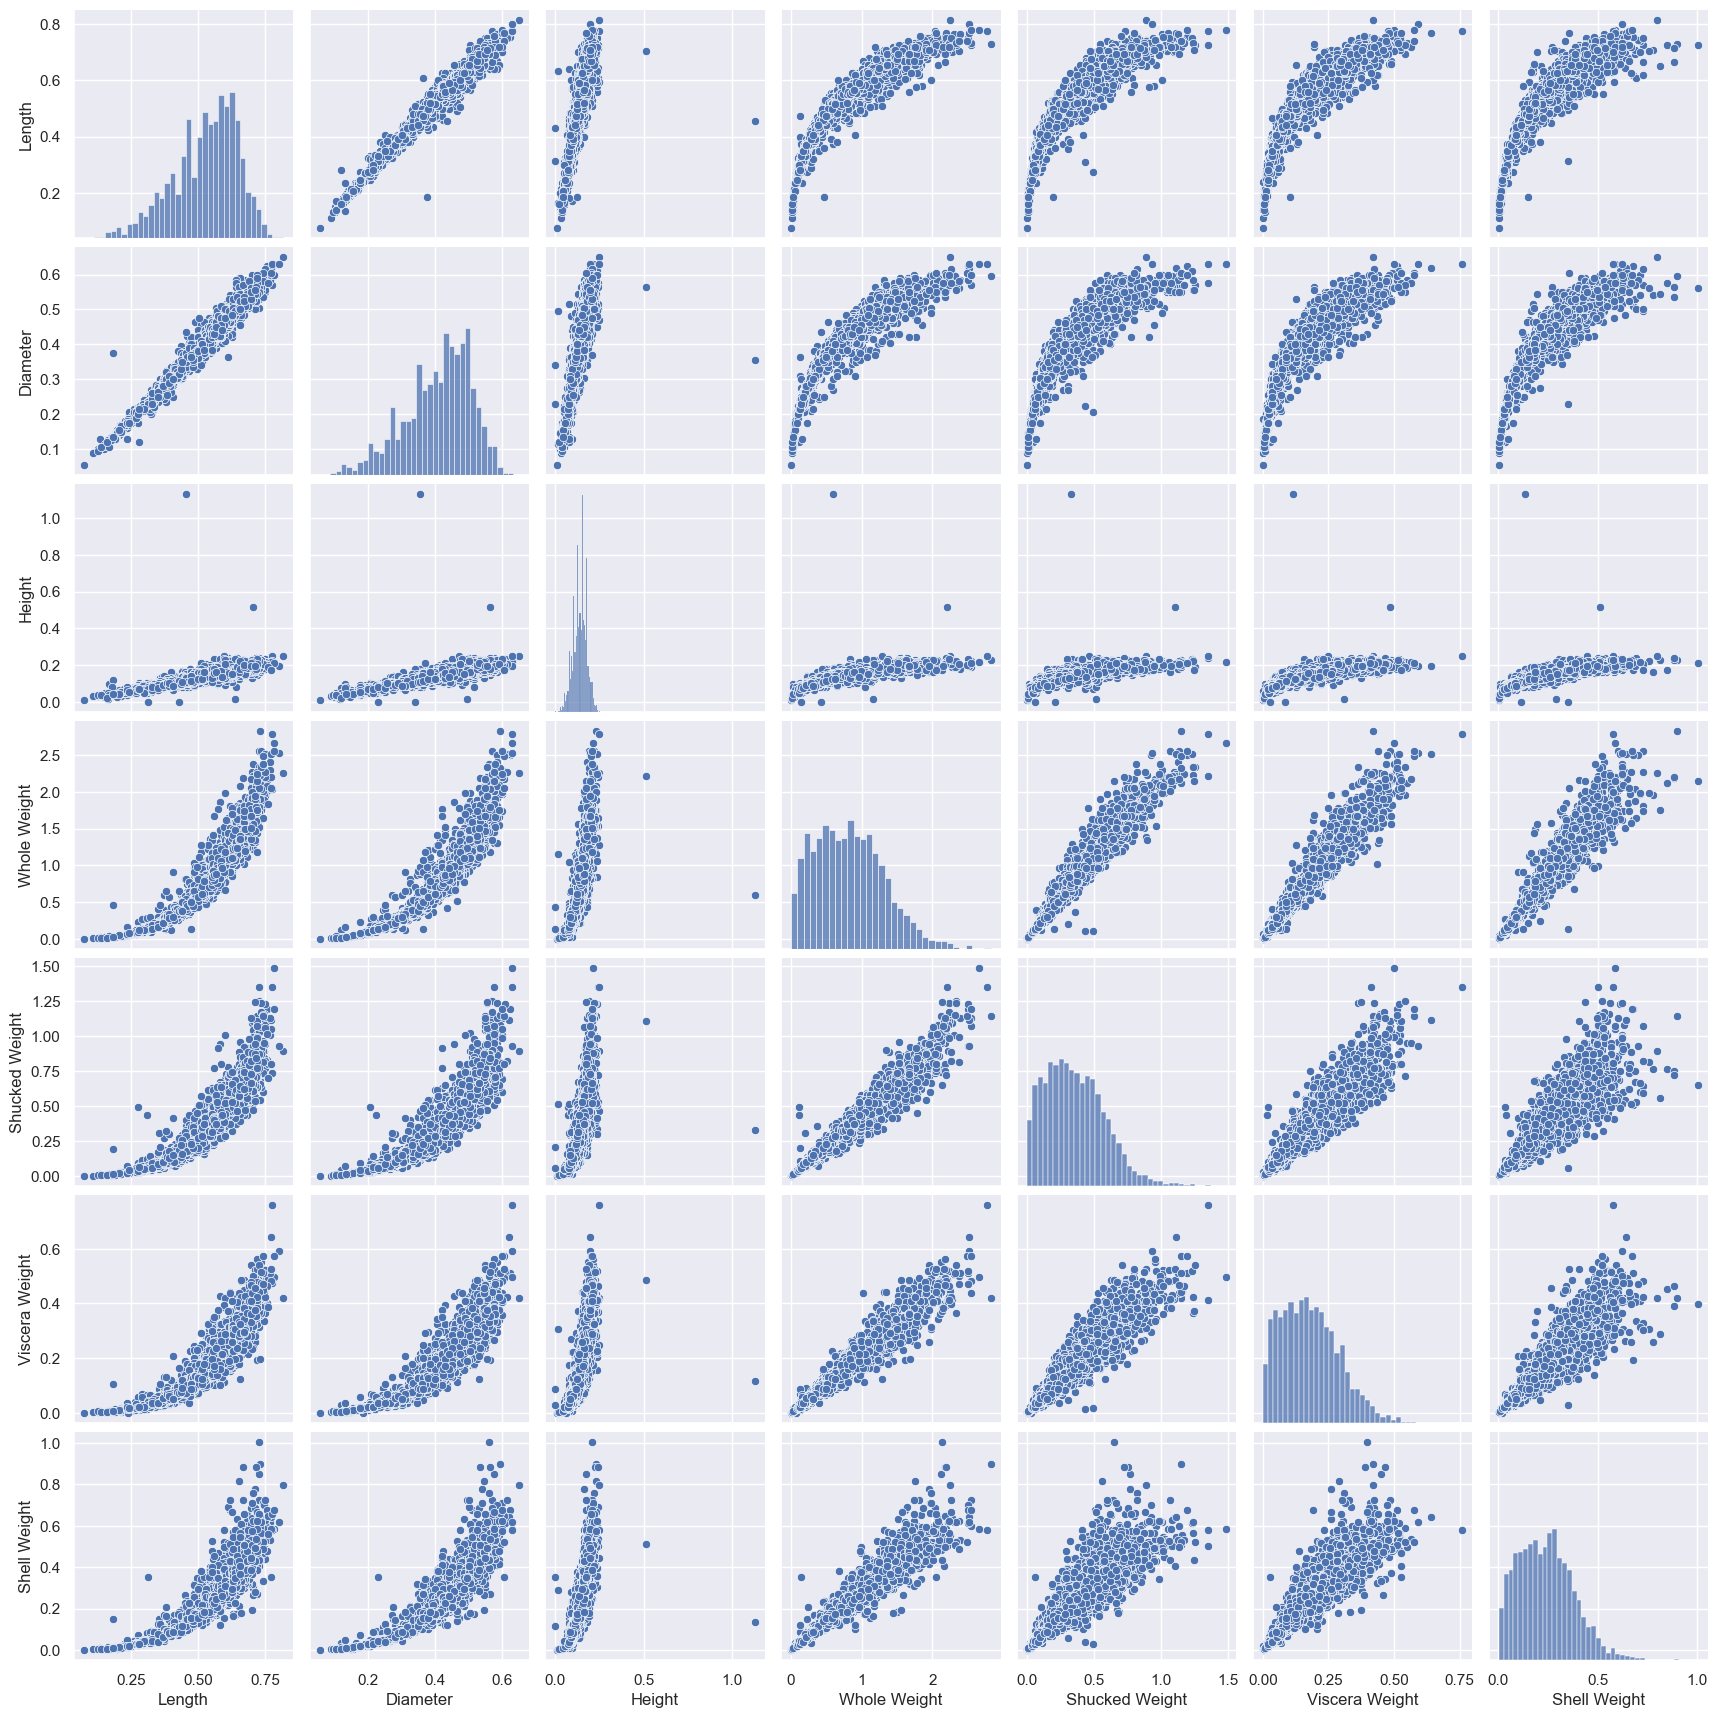

<Figure size 1500x1000 with 0 Axes>

In [110]:
# Function importing Dataset 
labels = ['Sex','Length','Diameter','Height', \
'Whole Weight','Shucked Weight','Viscera Weight','Shell Weight', 'Rings (Age)']

abalone_data = pd.read_csv('./data/abalone.data', header=None)
abalone_data.columns = labels

abalone_data["new 1"] = np.where(abalone_data['Rings (Age)'] <= 7, 1, 0)
abalone_data["new 2"] = np.where(((abalone_data['Rings (Age)'] > 7) & (abalone_data['Rings (Age)'] <= 10)), 2, 0)
abalone_data["new 3"] = np.where(((abalone_data['Rings (Age)'] > 10) & (abalone_data['Rings (Age)'] <= 15)), 3, 0)
abalone_data["new 4"] = np.where(abalone_data['Rings (Age)'] > 15, 4, 0)
abalone_data["Age by Class"] = abalone_data["new 1"] + \
    abalone_data["new 2"] + abalone_data["new 3"] + abalone_data["new 4"]

abalone_data = abalone_data.drop(['Rings (Age)', 'new 1', 'new 2', 'new 3', 'new 4'], axis=1)

# Printing the dataset shape 
print(f"Dataset Shape: \n{abalone_data.shape}\n") 
    
# Printing the first few rows of the dataset 
print(f"Transformed dataset: \n{abalone_data.head()}\n")

# Full feature set (8 params)
x = abalone_data.iloc[:,0:8]

# Target feature
y = abalone_data.iloc[:,-1]

sb.set(rc = {'figure.figsize':(15,10)})
sb.pairplot(data=x, palette='rocket')
plt.show()
plt.clf()

## Step 2 - Clean the Dataset
Sci-kit Learn's implementation of CART does not allow for categorical variables, so the 'Sex' feature will be converted as follows:
Male (M) -> 0
Female (F) -> 1
Infant(I) -> -1

No further cleansing is needed at this stage. Normalisation May be performed later if needed.

In [111]:
#Convert 'Sex' feature
x.iloc[:,0] = x.iloc[:,0].replace(['M','F','I'],[0,1,-1])

## Step 3 - Apply the CART Model and Report Performance

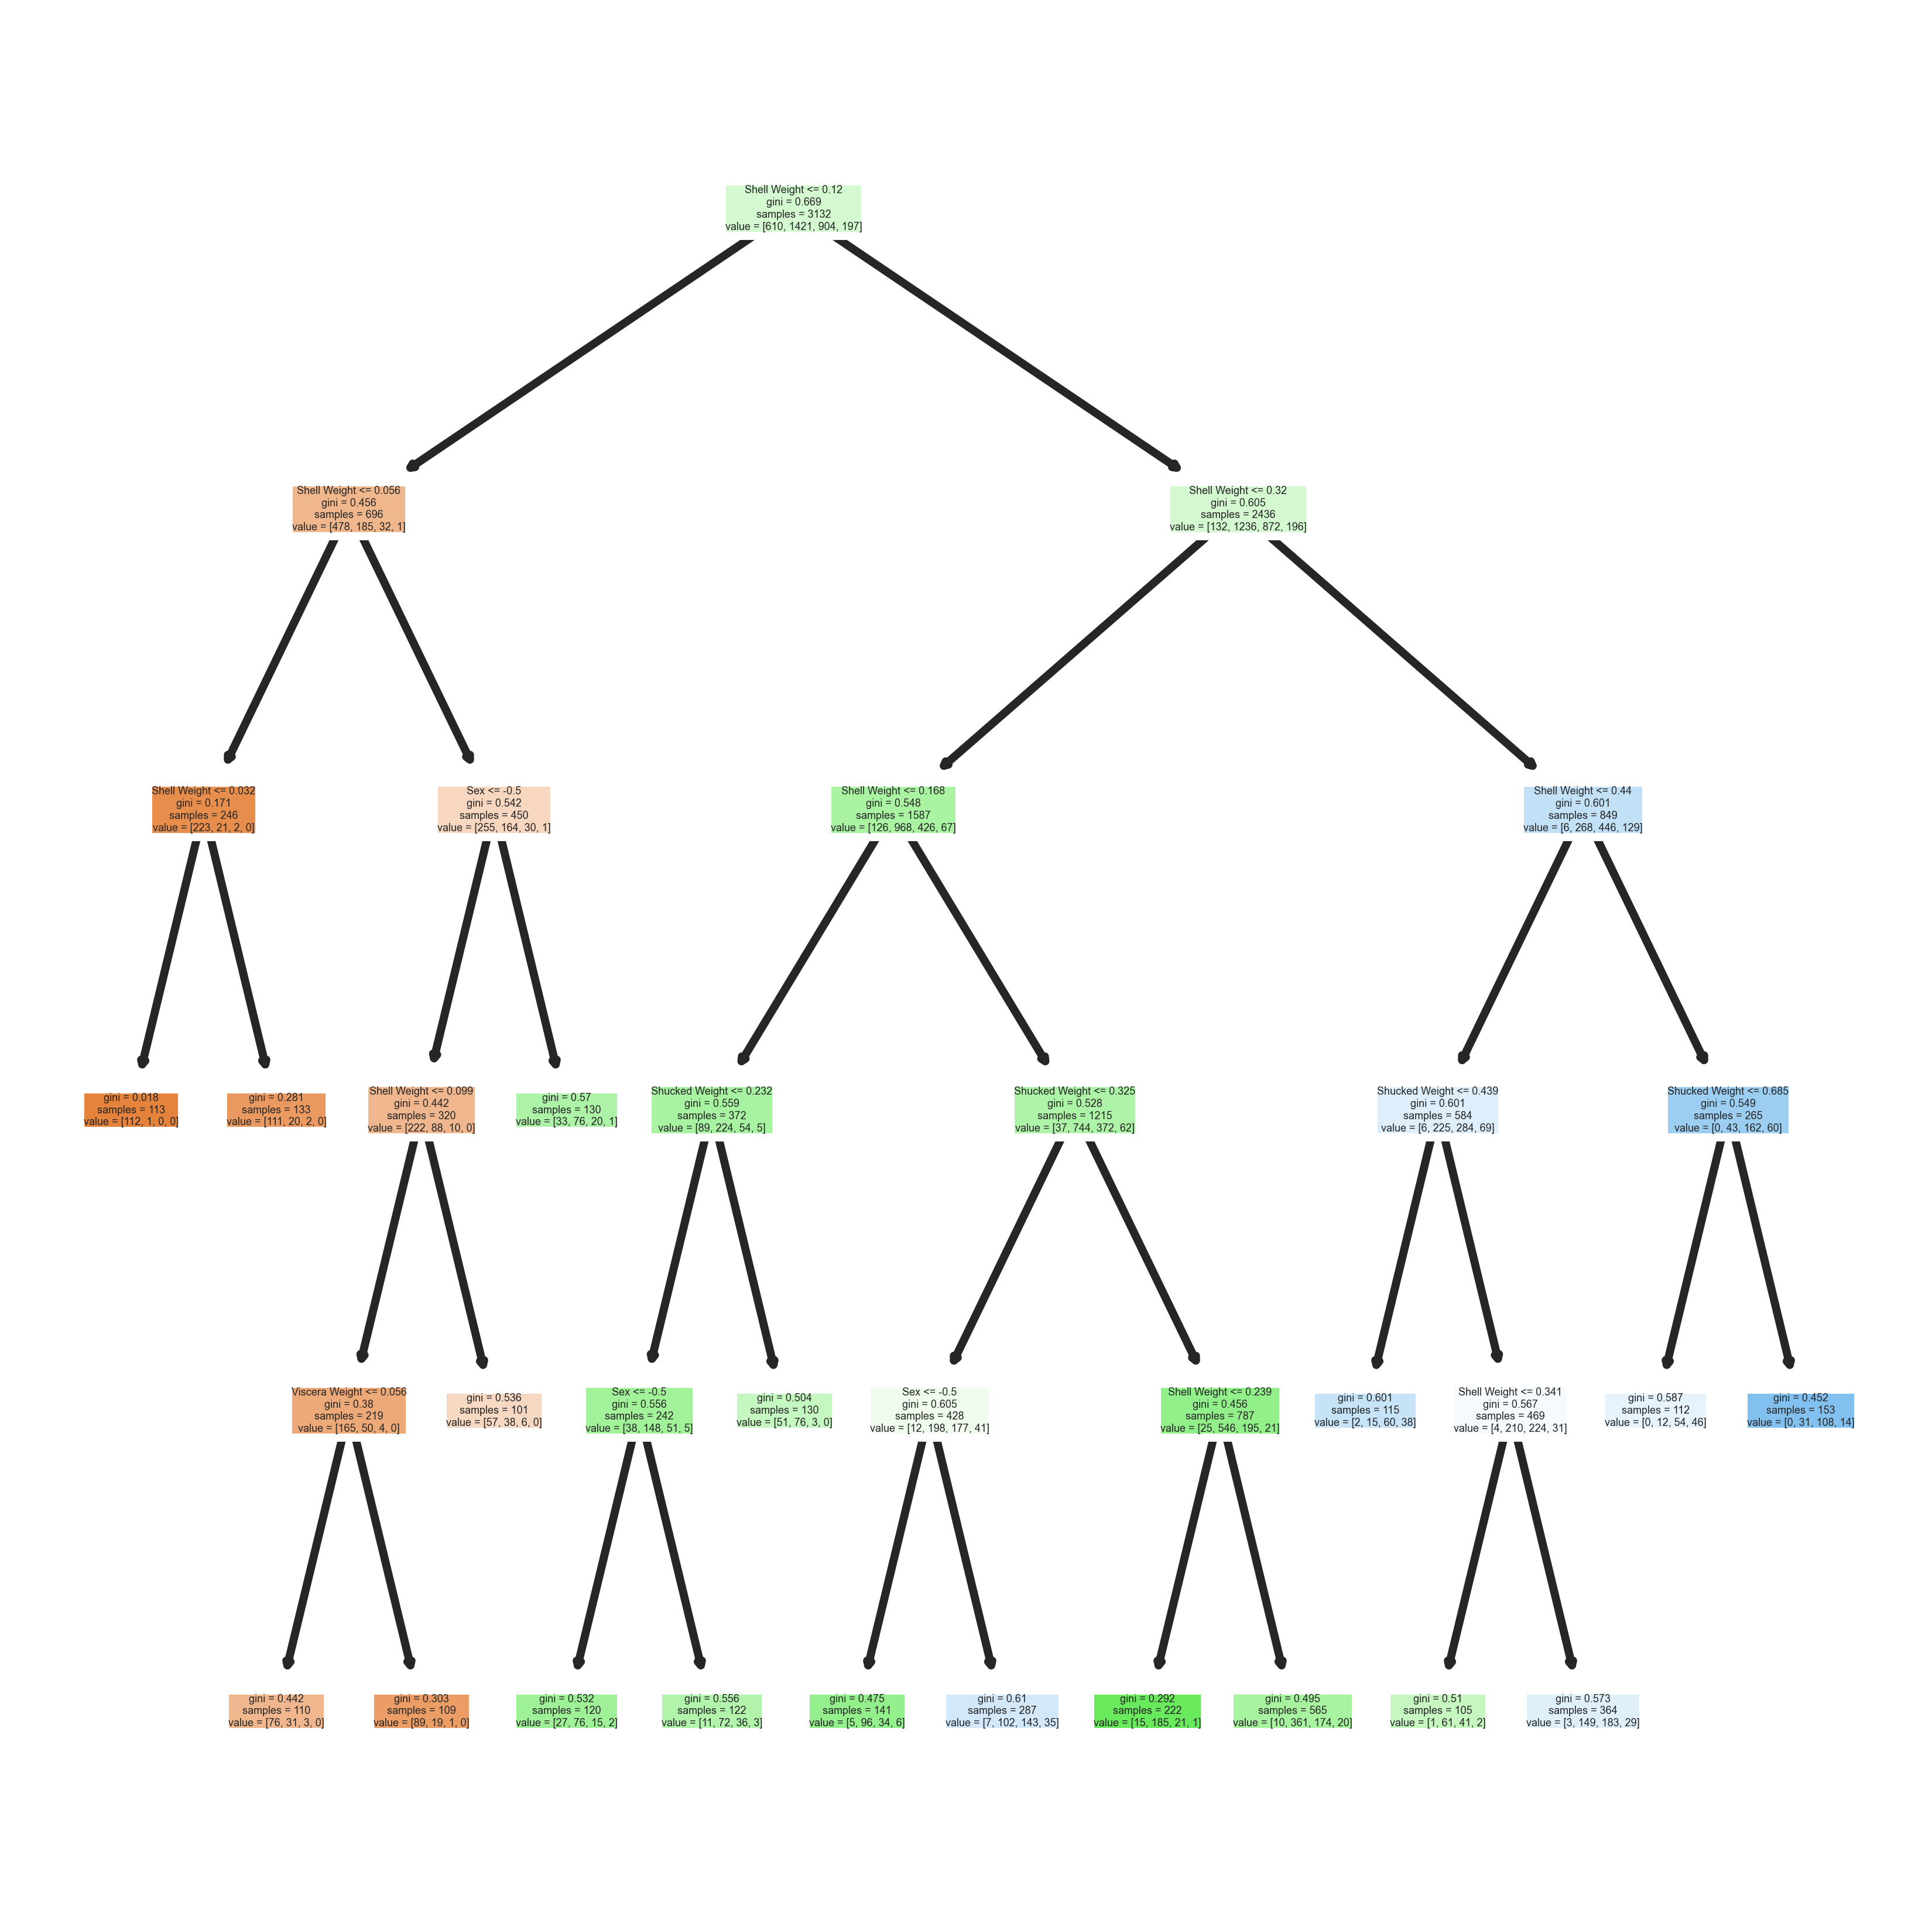

CART model parameters: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': RandomState(MT19937) at 0x2B5A71E40, 'splitter': 'best'}

CART model train score: 
0.6372924648786717

CART model test score: 
0.6334928229665072

CART model classification report: 
              precision    recall  f1-score   support

           1       0.84      0.76      0.79       229
           2       0.65      0.68      0.66       470
           3       0.49      0.60      0.54       282
           4       0.00      0.00      0.00        64

    accuracy                           0.63      1045
   macro avg       0.49      0.51      0.50      1045
weighted avg       0.61      0.63      0.62      1045



In [112]:
# Split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=TEST_PERCENT, random_state=random_state
    )

# Split data set test
#print(f"x_train: \n{x_train}\n")
#print(f"x_test: \n{x_test}\n")
#print(f"y_train: \n{y_train}\n")
#print(f"y_test: \n{y_test}\n")

# Create the classifier
cart_1 = DecisionTreeClassifier(random_state=random_state,
    max_depth=MAX_DEPTH,
    min_samples_leaf=MIN_SAMPLES)

# Fit the model
cart_1.fit(x_train, y_train)

# Make predictions based on the test data
y_pred = cart_1.predict(x_test)

# Plot the tree
plt.figure(figsize=(4,4), dpi=1000)
plot_tree(cart_1, feature_names=labels, filled=True)
plt.show()

# Original labels and predictions
#print(f"Original labels: \n{y_test.to_string()}\n")
#print(f"Predictions: \n{pd.DataFrame(y_pred).to_string()}\n")  # Contains 1 null value?

# Output statistics
print(f"CART model parameters: \n{cart_1.get_params()}\n")
print(f"CART model train score: \n{cart_1.score(x_train, y_train)}\n")
print(f"CART model test score: \n{cart_1.score(x_test, y_test)}\n")
#print(f'CART model test RMSE: \n{mean_squared_error(y_test, y_pred, squared=False)}\n')
print(f"CART model classification report: \n{classification_report(y_test, y_pred)}")


## Step 4 - Attempt to improve performance by pre and/or post pruning

In [113]:
# Perform a grid search to look for a better model (pre-pruning/early stopping)
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=random_state),
    param_grid=ParameterGrid(
        {
            "min_samples_leaf": [[split] for split in np.arange(10, 200, 5)],
            "max_depth": [[depth] for depth in np.arange(1, 30, 1)]
        }
    )
)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best estimator
print(f"Best estimator: \n{grid_search.best_estimator_}\n")

#Create a tree 
best_tree = grid_search.best_estimator_
y_pred_search = best_tree.predict(x_test)
print(f"Search model train score: \n{best_tree.score(x_train, y_train)}\n")
print(f"Search model test score: \n{best_tree.score(x_test, y_test)}\n")
#print(f'Search model test RMSE: \n{mean_squared_error(y_test, y_pred_search, squared=False)}\n')

Best estimator: 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=60,
                       random_state=RandomState(MT19937) at 0x2B5B92540)

Search model train score: 
0.640485312899106

Search model test score: 
0.6373205741626794



## Step 5 - Random Forest
First we'll try a guess at a random forest with 5 estimators, then we'll try a grid search for how many trees performs the best.

In [114]:
# Set up the random forest
random_forest = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=random_state)
random_forest.fit(x_train, y_train)
y_pred_forest = random_forest.predict(x_test)

# Output statistics
print(f"Forest model parameters: \n{random_forest.get_params()}\n")
print(f"Forest model train score: \n{random_forest.score(x_train, y_train)}\n")
print(f"Forest model test score: \n{random_forest.score(x_test, y_test)}\n")
#print(f'CART model test RMSE: \n{mean_squared_error(y_test, y_pred, squared=False)}\n')
print(f"Forest model classification report: \n{classification_report(y_test, y_pred_forest)}")

Forest model parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': RandomState(MT19937) at 0x2B5A71E40, 'verbose': 0, 'warm_start': False}

Forest model train score: 
0.9489144316730523

Forest model test score: 
0.570334928229665

Forest model classification report: 
              precision    recall  f1-score   support

           1       0.76      0.72      0.74       229
           2       0.59      0.67      0.62       470
           3       0.41      0.39      0.40       282
           4       0.29      0.12      0.17        64

    accuracy                           0.57      1045
   macro avg       0.51      0.48      0.48      1045
weighted avg       0.56      0.57      0.5

In [115]:
# Try a grid search for the best number of estimators in the random forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=random_state),
    param_grid=ParameterGrid(
        {
            "n_estimators": [[n] for n in np.arange(1, 50, 1)]
        }
    )
)

# Fit the model
grid_search_rf.fit(x_train, y_train)

# Print the best estimator
print(f"Best estimator: \n{grid_search_rf.best_estimator_}\n")

#Create a tree 
best_trees = grid_search_rf.best_estimator_
y_pred_rfsearch = best_trees.predict(x_test)
print(f"Search model train score: \n{best_trees.score(x_train, y_train)}\n")
print(f"Search model test score: \n{best_trees.score(x_test, y_test)}\n")
#print(f'Search model test RMSE: \n{mean_squared_error(y_test, y_pred_search, squared=False)}\n')

Best estimator: 
RandomForestClassifier(n_estimators=43,
                       random_state=RandomState(MT19937) at 0x17F4E6140)

Search model train score: 
0.9996807151979565

Search model test score: 
0.6535885167464115



## Step 6 - Run 10 experiments for both the CART and bagging models

In [117]:
cart_train_scores = []
cart_test_scores = []
rf_train_scores = []
rf_test_scores = []

# Cycle through 10 experiments (different sata sets) for each
for exp in np.arange(1,10,1):
    random_state = np.random.RandomState(seed=exp)

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=TEST_PERCENT, random_state=random_state
    )

    # The original CART specification that had the best test score
    cart_experiment = DecisionTreeClassifier(random_state=random_state,
    max_depth=MAX_DEPTH,
    min_samples_leaf=MIN_SAMPLES)

    cart_experiment.fit(x_train, y_train)

    cart_train_scores.append(cart_experiment.score(x_train, y_train))
    cart_test_scores.append(cart_experiment.score(x_test, y_test))

    # Random forest using the best model using grid search
    rf_experiment = RandomForestClassifier(
        n_estimators=37, random_state=random_state)
    
    rf_experiment.fit(x_train, y_train)

    rf_train_scores.append(rf_experiment.score(x_train, y_train))
    rf_test_scores.append(rf_experiment.score(x_test, y_test))

print(f"CART train scores: \n{cart_train_scores}\n")
print(f"CART test scores: \n{cart_test_scores}\n")
print(f"CART test mean: {np.mean(cart_test_scores)}")
print(f"CART test std: {np.std(cart_test_scores)}\n")
print(f"RF train scores: \n{rf_train_scores}\n")
print(f"RF test scores: \n{rf_test_scores}\n")
print(f"RF test mean: {np.mean(rf_test_scores)}")
print(f"RF test std: {np.std(rf_test_scores)}\n")

CART train scores: 
[0.6376117496807152, 0.6392081736909323, 0.6513409961685823, 0.6398467432950191, 0.6401660280970626, 0.640485312899106, 0.6452745849297573, 0.632183908045977, 0.644955300127714]

CART test scores: 
[0.5684210526315789, 0.5789473684210527, 0.6086124401913876, 0.6478468899521531, 0.6172248803827751, 0.6287081339712919, 0.5933014354066986, 0.6, 0.6181818181818182]

CART test mean: 0.6068048910154173

CART test std: 0.02329398129745724

RF train scores: 
[0.9987228607918263, 0.9996807151979565, 0.9990421455938697, 0.9996807151979565, 0.9990421455938697, 0.9993614303959132, 0.9990421455938697, 0.9987228607918263, 0.9987228607918263]

RF test scores: 
[0.6210526315789474, 0.6086124401913876, 0.6019138755980862, 0.6296650717703349, 0.614354066985646, 0.6325358851674641, 0.6124401913875598, 0.6200956937799043, 0.6066985645933014]

RF test mean: 0.6163742690058479

RF test std: 0.009753094988171061

